In [11]:
using Plots
using ExponentialUtilities
using LaTeXStrings

In [12]:
# parameters
k, m, d = 1, 1, 0.05

# system matrix
A = [0     1
     -k/m -d/m];

In [13]:
# Time settings
t0, te = 0, 20
dt = 0.1

N = Int((te - t0) / dt) + 1

time_values = LinRange(t0, te, N);

# System dimension and initial state
n = 2
x0 = [2 1.5];

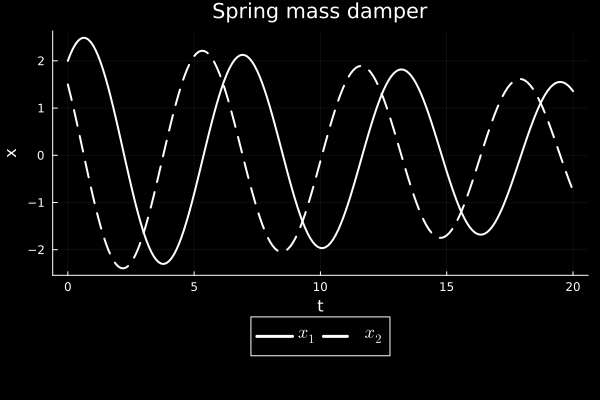

In [14]:
# Analytical solution
x_ana = zeros(n, N);
for i in 1:N
    x_ana[:, i] = exponential!(A*time_values[i]) * x0'
end

# Plotting the results
p1 = plot(xlabel="t", ylabel="x",
     title="Spring mass damper",grid=true,
     background_color="#000000")
plot!(p1, time_values, x_ana[1, :], linecolor=:white, linestyle=:solid,
     linewidth=2, label=L"x_{1}")
plot!(p1, time_values, x_ana[2, :], linecolor=:white, linestyle=:dash,
     linewidth=2, label=L"x_{2}")
plot!(p1, legend=:outerbottom, legendcolumns=2, legendfontcolor=:white,
     legendfontsize=12)

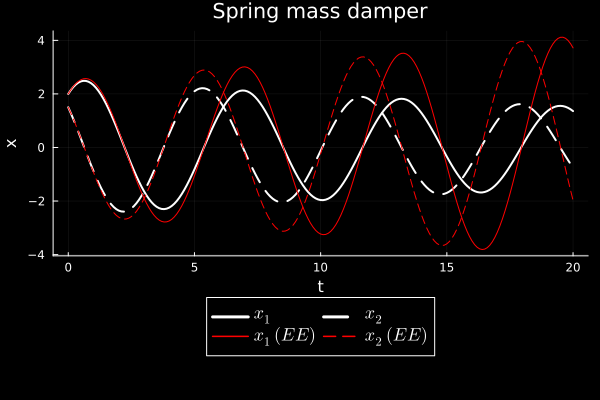

In [15]:
# Numerical solution
x_EE = zeros(n, N);
x_EE[:, 1] = x0

# Explicit Euler method
for i in 2:N
    x_EE[:, i] = x_EE[:, i - 1] + dt * A * x_EE[:, i - 1]
end

# Plotting the results
p1 = plot(xlabel="t", ylabel="x",
     title="Spring mass damper",grid=true,
     background_color="#000000")
plot!(p1, time_values, x_ana[1, :], linecolor=:white, linestyle=:solid,
     linewidth=2, label=L"x_{1}")
plot!(p1, time_values, x_ana[2, :], linecolor=:white, linestyle=:dash,
     linewidth=2, label=L"x_{2}")
plot!(p1, time_values, x_EE[1,:], linecolor=:red, linestyle=:solid,
     label=L"x_1~(EE)")
plot!(p1, time_values, x_EE[2,:], linecolor=:red, linestyle=:dash,
     label=L"x_2~(EE)")
plot!(p1, legend=:outerbottom, legendcolumns=2, legendfontcolor=:white,
     legendfontsize=12)

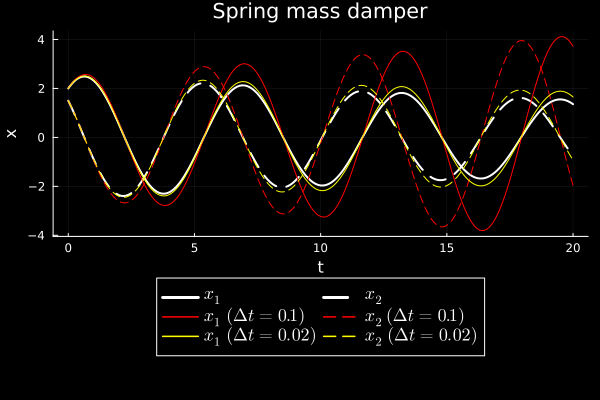

In [16]:
# Smaller time step
dt2 = dt / 5
N2 = Int((te - t0) / dt2) + 1
time_values2 = LinRange(t0, te, N2)

# Explicit Euler method
x_EE2 = zeros(n, N2)
x_EE2[:, 1] = x0
for i in 2:N2
    x_EE2[:, i] = x_EE2[:, i - 1] + dt2 * A * x_EE2[:, i - 1]
end

# Plotting the results
p1 = plot(xlabel="t", ylabel="x",
     title="Spring mass damper",grid=true,
     background_color="#000000")
plot!(p1, time_values, x_ana[1, :], linecolor=:white, linestyle=:solid,
    linewidth=2, label=L"x_{1}")
plot!(p1, time_values, x_ana[2, :], linecolor=:white, linestyle=:dash,
    linewidth=2, label=L"x_{2}")
plot!(p1, time_values, x_EE[1,:], linecolor=:red, linestyle=:solid,
    label=L"x_{1}~(\Delta t=0.1)")
plot!(p1, time_values, x_EE[2,:], linecolor=:red, linestyle=:dash,
    label=L"x_2~(\Delta t=0.1)")
plot!(p1, time_values2, x_EE2[1,:], linecolor=:yellow, linestyle=:solid,
    label=L"x_{1}~(\Delta t=0.02)")
plot!(p1, time_values2, x_EE2[2,:], linecolor=:yellow, linestyle=:dash,
    label=L"x_{2}~(\Delta t=0.02)")
plot!(p1, legend=:outerbottom, legendcolumns=2, legendfontcolor=:white,
    legendfontsize=12)

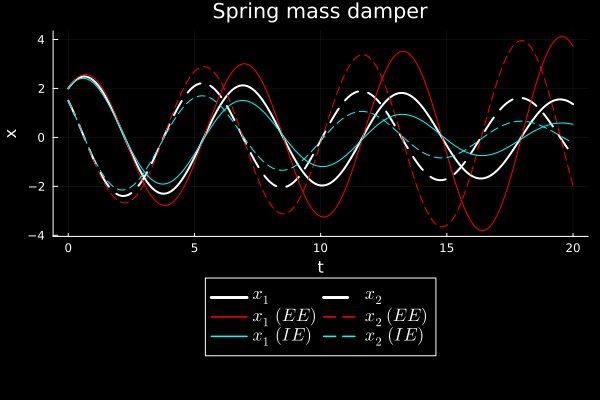

In [17]:
# Implicit Euler method
x_IE = zeros(n, N)
x_IE[:, 1] = x0

I = [1 0
     0 1]
B = inv(I - dt * A)
for i in 2:N
    x_IE[:, i] = B * x_IE[:, i - 1]
end

# Plotting the results
p1 = plot(xlabel="t", ylabel="x",
     title="Spring mass damper",grid=true,
     background_color="#000000")
plot!(p1, time_values, x_ana[1, :], linecolor=:white, linestyle=:solid,
    linewidth=2, label=L"x_{1}")
plot!(p1, time_values, x_ana[2, :], linecolor=:white, linestyle=:dash,
    linewidth=2, label=L"x_{2}")
plot!(p1, time_values, x_EE[1,:], linecolor=:red, linestyle=:solid,
    label=L"x_{1}~(EE)")
plot!(p1, time_values, x_EE[2,:], linecolor=:red, linestyle=:dash,
    label=L"x_2~(EE)")
plot!(p1, time_values, x_IE[1,:], linecolor=:cyan, linestyle=:solid,
    label=L"x_{1}~(IE)")
plot!(p1, time_values, x_IE[2,:], linecolor=:cyan, linestyle=:dash,
    label=L"x_{2}~(IE)")
plot!(p1, legend=:outerbottom, legendcolumns=2, legendfontcolor=:white,
    legendfontsize=12)

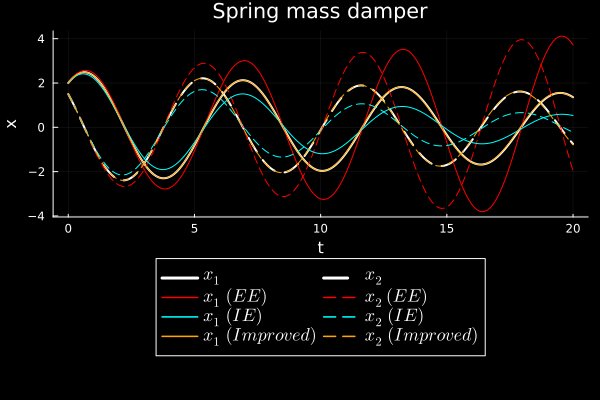

In [18]:
# Implicit Euler method
x_ImpE = zeros(n, N)
x_ImpE[:, 1] = x0

I = [1 0
     0 1]
B = inv(I - dt * A)
for i in 2:N
    x_half = x_ImpE[:, i - 1] + 0.5 * dt * A * x_ImpE[:, i - 1]
    x_ImpE[:, i] = x_ImpE[:, i - 1] + dt * A * x_half
end

# Plotting the results
p1 = plot(xlabel="t", ylabel="x",
     title="Spring mass damper",grid=true,
     background_color="#000000")
plot!(p1, time_values, x_ana[1, :], linecolor=:white, linestyle=:solid,
     linewidth=2, label=L"x_{1}")
plot!(p1, time_values, x_ana[2, :], linecolor=:white, linestyle=:dash,
    linewidth=2, label=L"x_{2}")
plot!(p1, time_values, x_EE[1,:], linecolor=:red, linestyle=:solid,
    label=L"x_{1}~(EE)")
plot!(p1, time_values, x_EE[2,:], linecolor=:red, linestyle=:dash,
    label=L"x_2~(EE)")
plot!(p1, time_values, x_IE[1,:], linecolor=:cyan, linestyle=:solid,
    label=L"x_{1}~(IE)")
plot!(p1, time_values, x_IE[2,:], linecolor=:cyan, linestyle=:dash,
    label=L"x_{2}~(IE)")
plot!(p1, time_values, x_ImpE[1,:], linecolor=:orange, linestyle=:solid,
    label=L"x_{1}~(Improved)")
plot!(p1, time_values, x_ImpE[2,:], linecolor=:orange, linestyle=:dash,
    label=L"x_{2}~(Improved)")
plot!(p1, legend=:outerbottom, legendcolumns=2, legendfontcolor=:white,
    legendfontsize=12)